In [1]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import os
import json
import ast

In [2]:
stock = '\A'

In [3]:
data = pd.DataFrame()
for file in os.listdir("C:\\Users\darre\Desktop\ISS\Sem 3\BIG DATA ENGINEERING\CA\stocks"+stock):
    full_filename = "%s/%s" % ("C:\\Users\darre\Desktop\ISS\Sem 3\BIG DATA ENGINEERING\CA\stocks"+stock, file)
    with open(full_filename,'r') as fi:
        dict = json.load(fi)
        data_temp = json_normalize(dict)
        data = data.append(data_temp)

In [4]:
# Create DateTime as Index
data['DateTime'] = data['date'] + ' ' + data['minute']
data = data[['marketAverage','DateTime']]
data.index = pd.to_datetime(data['DateTime'])
data = data.drop(['DateTime'], axis=1)

# Drop missing data where marketAverage = 0
data = data[  (data['marketAverage'] > 0)  ]
data.head()

,marketAverage
DateTime,
2019-02-01 09:30:00,76.161
2019-02-01 09:31:00,76.134
2019-02-01 09:32:00,76.081
2019-02-01 09:33:00,76.151
2019-02-01 09:34:00,76.175


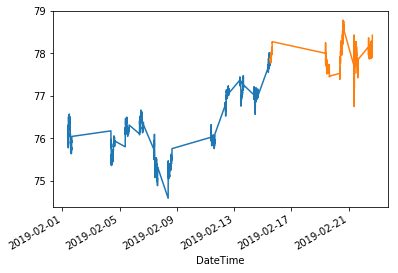

In [5]:
#divide into train and validation set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

#plotting the data
train['marketAverage'].plot()
valid['marketAverage'].plot()

C:\Anaconda3\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-15441.151, BIC=-15403.251, Fit time=0.981 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-15437.375, BIC=-15424.742, Fit time=0.784 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-15438.009, BIC=-15419.060, Fit time=0.698 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-15438.178, BIC=-15419.228, Fit time=0.564 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-15440.577, BIC=-15408.995, Fit time=2.036 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-15439.396, BIC=-15395.180, Fit time=2.570 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=-15439.486, BIC=-15395.270, Fit time=3.541 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-15434.804, BIC=-15409.538, Fit time=1.503 seconds
Fit ARIMA: order=

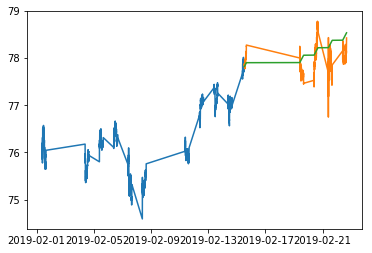

In [6]:
#building the model
from pyramid.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [7]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

0.3693478864100374
